In [127]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, binom, t, chi2, f
from scipy.integrate import quad


# 2.1 Random Variables and Probability Distributions

## Probability Distributions of Discrete Random Variables

In [25]:
np.random.choice(np.arange(1,7))

5

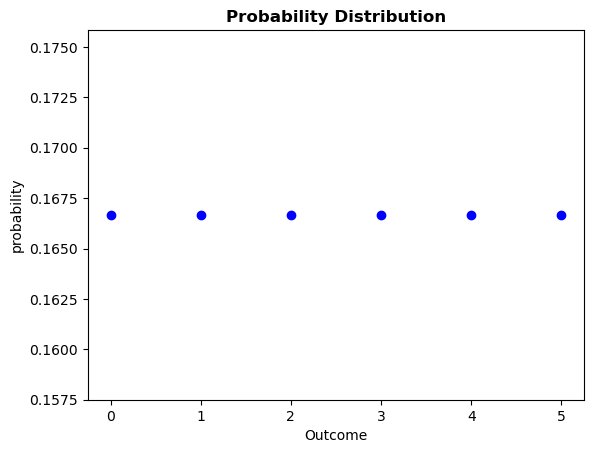

In [28]:
# Generate the vector of probabilities
probability=np.repeat(1/6,6)

# Plot the probabilities
plt.plot(probability, 'bo') #The vector and the style. "bo" stands for blue circle. 
plt.title('Probability Distribution',fontweight="bold") #Title
plt.xlabel('Outcome') #Label x-axis
plt.ylabel('probability');#Label y-axis

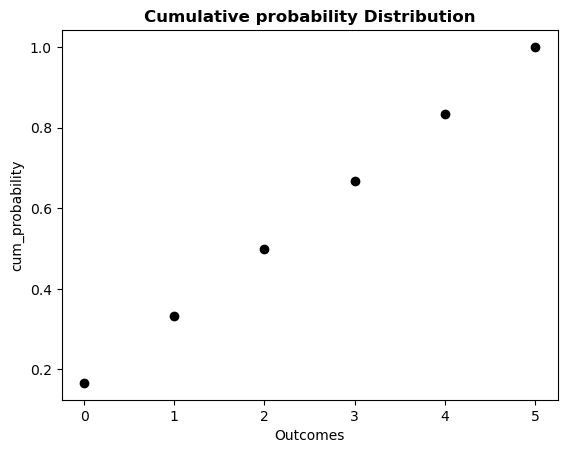

In [30]:
# generate the vector of cumulative probabilities 
cum_probability = np.cumsum(probability)

# plot the probabilites
plt.plot(cum_probability, 'ko')
plt.title('Cumulative probability Distribution',fontweight="bold")
plt.xlabel('Outcomes')
plt.ylabel('cum_probability');

## Bernoulli Trials

In [33]:
np.random.choice(["H", "T"])

'T'

In [35]:
binom.pmf(5, 10, 0.5)

0.24609375000000003

In [36]:
# compute P(4 <= k <= 7) using 'binom.pmf()'
binom.pmf(range(4,8),  10,  0.5).sum()

0.7734374999999998

In [37]:
# set up vector of possible outcomes
k=range(0,11)
k

range(0, 11)

In [38]:
# assign the probabilities
probability=binom.pmf(k,  10,  0.5)

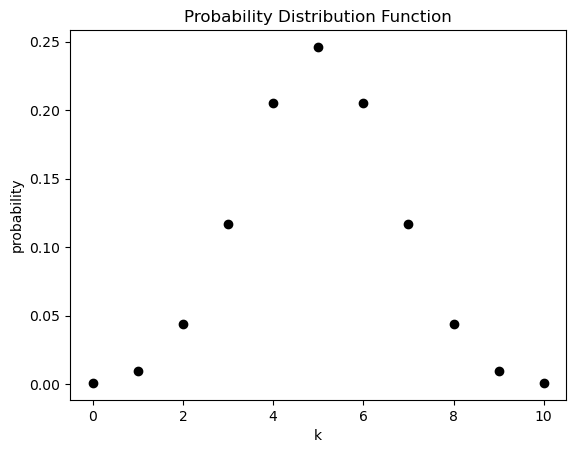

In [40]:
# plot the outcomes against their probabilities

plt.plot(probability, 'ko')
plt.title('Probability Distribution Function')
plt.xlabel('k')
plt.ylabel('probability');

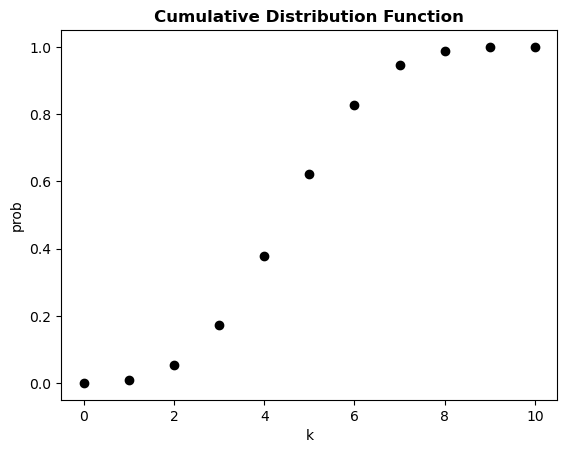

In [41]:
# compute cumulative probabilities
prob=binom.cdf(k,10,0.5)
# plot the cumulative probabilities
plt.plot(prob, 'ko')
plt.title('Cumulative Distribution Function', fontweight="bold")
plt.xlabel('k')
plt.ylabel('prob');

## Expected Value, Mean and Variance

In [42]:
# compute mean of natural numbers from 1 to 6
np.arange(1,7).mean()

3.5

In [53]:
# set seed for reproducibility
np.random.seed(1)
# rolling a dice three times in a row
np.random.choice(np.arange(1,7), size=3)


array([6, 4, 5])

In [58]:
# set seed for reproducibility
np.random.seed(1)

# compute the sample mean of 10000 dice rolls
sample=np.random.choice(np.arange(1,7), size=1000)
sum(sample)/len(sample)

3.49

In [72]:
print(np.var(np.arange(1,7))) #Population variance
print(np.var(np.arange(1,7), ddof=1)) #Sample variance

2.9166666666666665
3.5


## Probability Distributions of Continuous Random Variables

Consider the continuous random variable $X$ with PDF

$$ f_X(x) = \frac{3}{x^4}, x>1 $$

In [73]:
#define functions
def f(x):
    return 3/x**4
def g(x):
    return x*f(x)
def h(x):
    return x**2*f(x)

In [75]:
# compute area under the density curve
area, err =quad(f, 1, np.inf)
area

1.0

In [76]:
# compute E(X)
EX, err= quad(g, 1, np.inf)
EX

1.5

In [77]:
# compute Var(X)
Varx, err=quad(h, 1, np.inf)
Varx -EX**2

0.75

## The Normal Distribution

PDF of Normal distribution:

\begin{align}
f(x) = \frac{1}{\sqrt{2 \pi} \sigma} \exp{-(x - \mu)^2/(2 \sigma^2)}
\end{align}


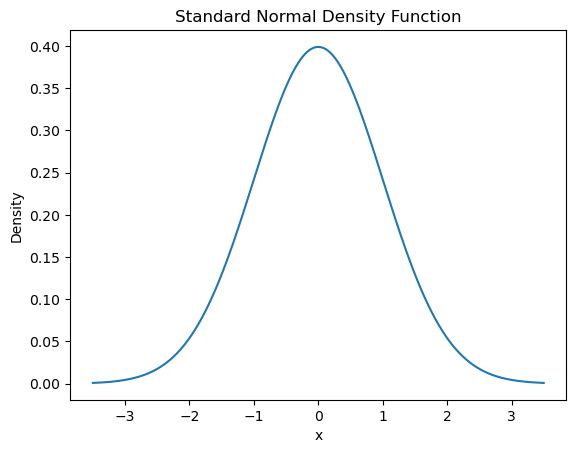

In [83]:
# draw a plot of the N(0,1) PDF

#x-axis ranges from -3.5 and 3.5 with .001 steps
x = np.arange(-3.5, 3.5, 0.001)

#plot normal distribution with mean 0 and standard deviation 1
plt.plot(x,norm.pdf(x))
plt.title('Standard Normal Density Function')
plt.ylabel('Density')
plt.xlabel('x');


In [84]:
# compute density at x=-1.96, x=0 and x=1.96
norm.pdf([-1.96, 0, 1.96])

array([0.05844094, 0.39894228, 0.05844094])

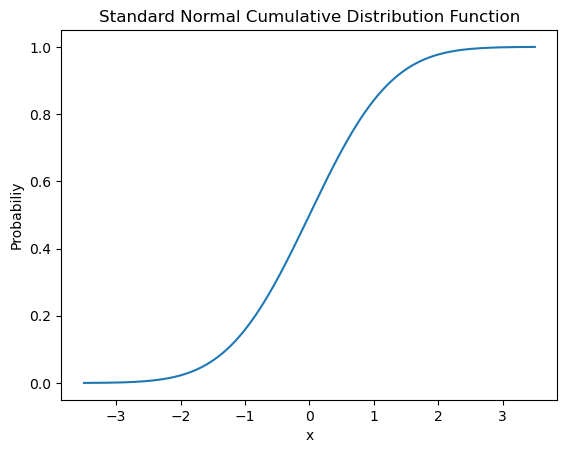

In [86]:
# plot the standard normal CDF
plt.plot(x, norm.cdf(x))
plt.title('Standard Normal Cumulative Distribution Function')
plt.ylabel('Probabiliy')
plt.xlabel('x');

In [87]:
# define the standard normal PDF as function

def f(x):
    return 1/(np.sqrt(2*np.pi))*np.exp(-0.5*x**2)

In [88]:
# compute densities
list(map(f, [-1.96, 0, 1.96]))

[0.05844094433345147, 0.3989422804014327, 0.05844094433345147]

In [89]:
# compare to the results 
np.around(list(map(f, [-1.96, 0, 1.96])),10)==np.around(norm.pdf([-1.96, 0, 1.96]),10) #rounded to 10th digit

array([ True,  True,  True])

In [91]:
# integrate f()
quad(f, -np.inf, 1.337) #0.9093887 with absolute error < 1.7e-07

(0.9093886815817964, 1.3521527914496658e-08)

In [92]:
# compute the probability using norm.cdf()
norm.cdf(1.337)

0.9093886815817953

In [93]:
# compute the probability
1 - 2 * (norm.cdf(-1.96))

0.9500042097035591

In [94]:
norm.cdf(x=4, loc= 5, scale=5) - norm.cdf(3, 5,5) 

0.07616203217122114

## The Chi-Squared Distribution

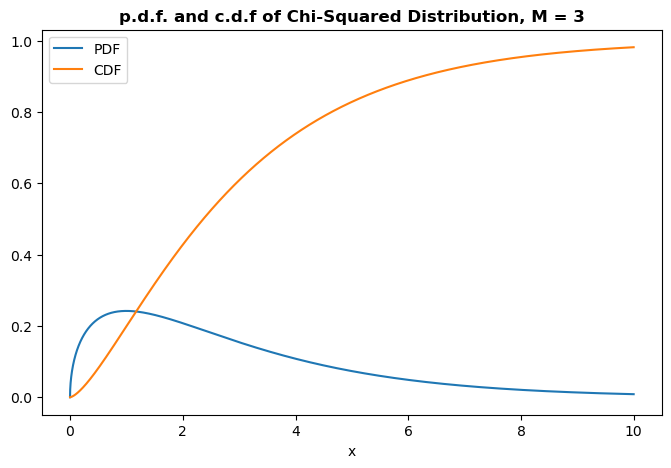

In [54]:
#x-axis range from 0 and 10 with .001 steps
x = np.arange(0, 10, 0.001)

#plot chi0-squared distribution with 3 degrees of freedom
fig=plt.figure(figsize=(8,5))
plt.plot(x, chi2.pdf(x, df=3), label='PDF') #Plot the PDF
plt.plot(x,chi2.cdf(x, df=3), label='CDF') # add the CDF to the plot
plt.legend() # add a legend to the plot
plt.title("p.d.f. and c.d.f of Chi-Squared Distribution, M = 3",fontweight="bold")
plt.ylabel('')
plt.xlabel('x');

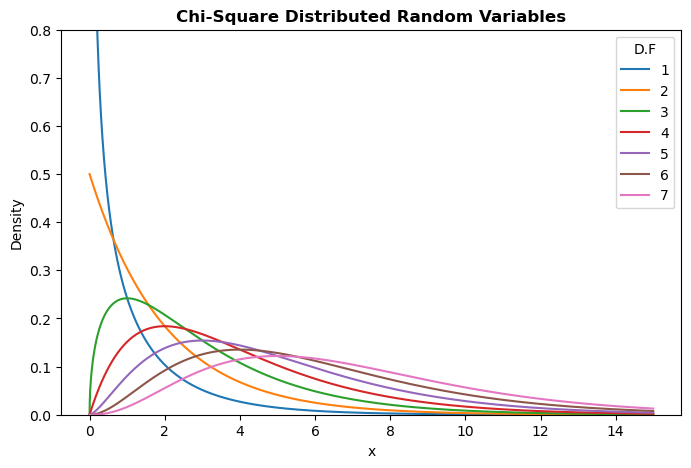

In [101]:
x = np.arange(0, 15, 0.001)

#Set figure size
plt.figure(figsize=(8,5))

# plot the density for M=1
plt.plot(x, chi2.pdf(x, df=1), label=1) 

# add densities for M=2,...,7 to the plot using a 'for()' loop 
for i in range (2,8):
    plt.plot(x, chi2.pdf(x, df=i), label=i)
    
#Figure elements    
plt.ylim(0,0.8)
plt.legend(title="D.F")
plt.title('Chi-Square Distributed Random Variables',fontweight="bold")
plt.ylabel('Density')
plt.xlabel('x');    

## The Student t Distribution

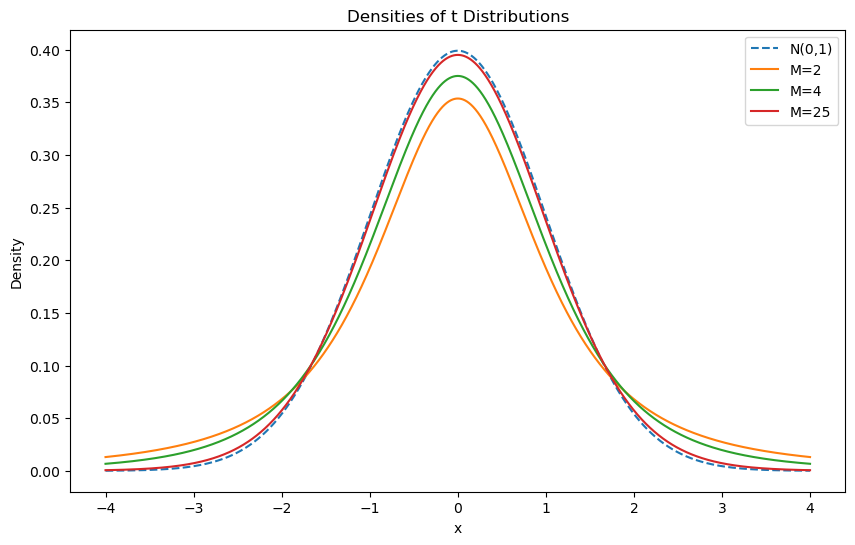

In [105]:
#Set figure size
fig=plt.figure(figsize=(10,6))

# plot the standard normal density
x = np.arange(-4, 4, 0.001)
plt.plot(x, norm.pdf(x),'--', label='N(0,1)')

# plot density for M=2,4,25
for i in [2,4,25]:
    plt.plot(x, t.pdf(x, df=i), label='M=%a'%i )
    
#Add legend, title and axis labels
plt.ylabel('Density')
plt.xlabel('x')
plt.title('Densities of t Distributions')
plt.legend();

## The F Distribution

In [107]:
1-f.cdf(2,3,14)

0.1603538377468886

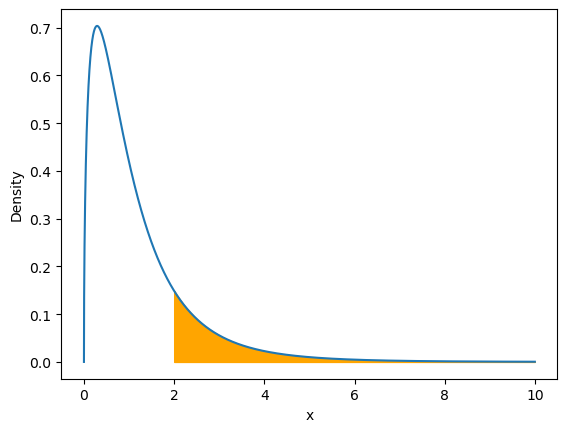

In [108]:
# draw density of F_{3, 14}
x = np.arange(0, 10, 0.001)
plt.plot(x, f.pdf(x,3,14))

# draw the polygon
plt.fill_between(x,f.pdf(x,3,14),where=2<x, color='orange')
plt.xlabel('x')
plt.ylabel('Density');

# 2.2 Random Sampling and the Distribution of Sample Averages

In [110]:
sum(np.random.choice([1,2,3,4,5,6],size=2))

9

In [116]:
# Vector of outcomes
S = np.arange(2,13)

# Vector of probabilities
a=np.arange(1,7) #[1,2,3,4,5,6]
b=np.arange(1,6)[::-1] #[5,4,3,2,1]
PS = np.concatenate((a,b),axis=0)/36 #Cconcatenate both and divide by 36

# Expectation of S
ES = sum(S * PS)
round(ES)


7

In [117]:
# Variance of S
VarS = sum((S - ES)**2 * PS)
VarS


5.833333333333334

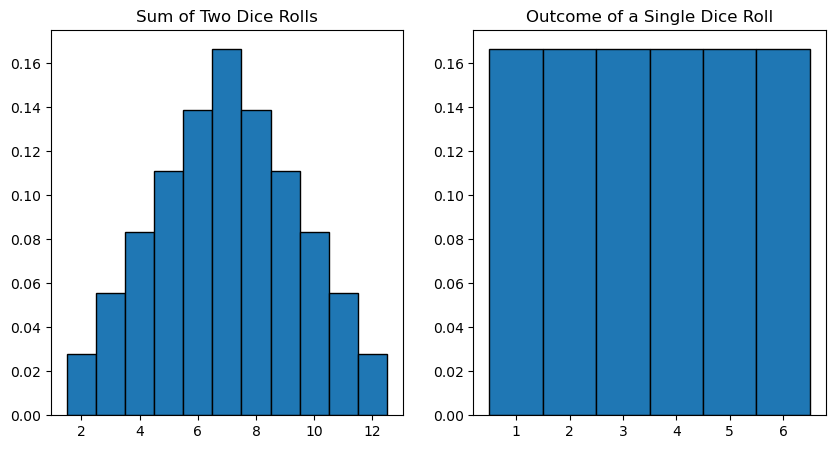

In [118]:
# divide the plotting area into one row with two columns
fig, ax=plt.subplots(1,2, figsize=(10,5))

# plot the distribution of S
ax[0].bar(np.arange(2,13),PS,width=1, edgecolor='black')
ax[0].set_title("Sum of Two Dice Rolls")

# plot the distribution of D 
probability=np.repeat(1/6,6)
ax[1].bar(np.arange(1,7),probability,width=1, edgecolor='black')
ax[1].set_title("Outcome of a Single Dice Roll");

## Mean and Variance of the Sample Mean

In [129]:
# set sample size and number of samples
n = 10
reps = 10000

# perform random sampling
samples=np.random.normal(size=(n,reps))

# compute sample means
sample_avgs=samples.mean(axis=0)

In [135]:
# print the first 5 entries to the console
sample_avgs[0:5]


array([-0.01871574, -0.0728257 ,  0.16751141, -0.13520421, -0.13615431])

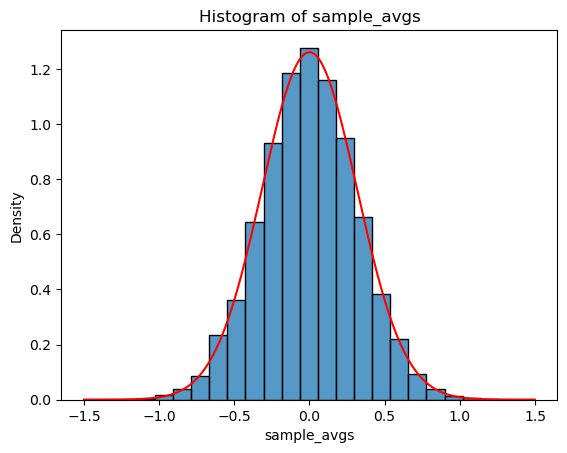

In [71]:
# Plot the density histogram
sns.histplot(sample_avgs, bins=20, stat='density')

# overlay the theoretical distribution of sample averages on top of the histogram
x = np.arange(-1.5,1.5, 0.001)
plt.plot(x, norm.pdf(x, scale=1/np.sqrt(10)), color="red")
plt.title('Histogram of sample_avgs')
plt.xlabel('sample_avgs')
plt.ylabel('Density');


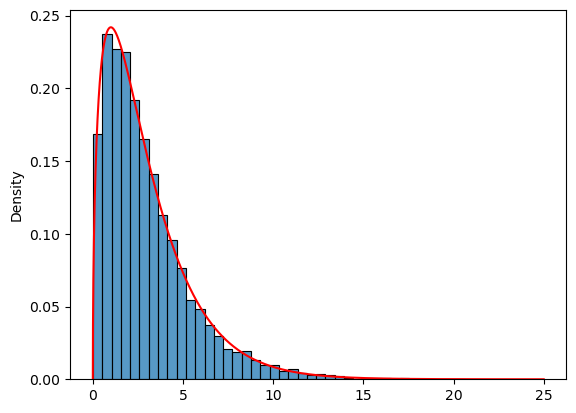

In [136]:
# number of repetitions
reps = 10000

# set degrees of freedom of a chi-Square Distribution
DF = 3 

# sample 10000 column vectors à 3 N(0,1) R.V.S
samples=np.random.normal(size=(DF,reps))

# column sums of squares
samples=samples**2
sample_avgs=samples.sum(axis=0)

# histogram of column sums of squares
sns.histplot(sample_avgs,bins=40,stat='density')

# add theoretical density
x = np.arange(0,25, 0.001)
plt.plot(x, chi2.pdf(x, df=3), color="red");

## Large Sample Approximations to Sampling Distributions

In [147]:
# set seed
np.random.seed(3)

# set number of coin tosses and simulate
N=30000
Y=np.random.choice([0,1], size=N)

# Calculate R_n for 1:N
S=np.cumsum(Y)
R=S/np.arange(1,30001)

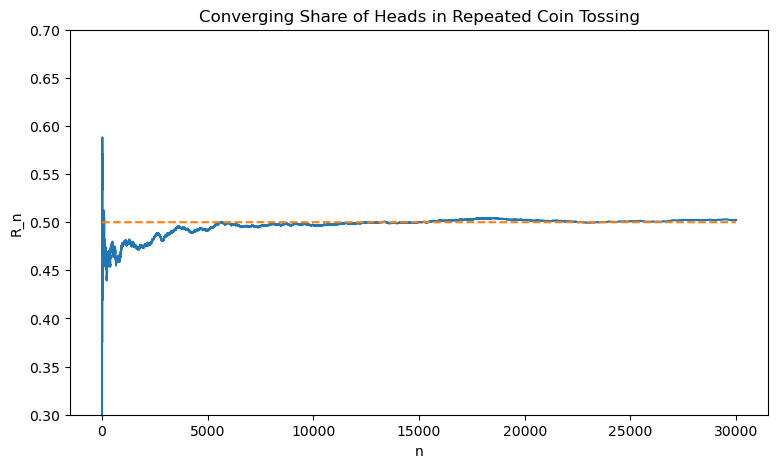

In [154]:
# Plot the path
fig=plt.figure(figsize=(9,5))
plt.plot(R)

# Add a dashed line for R_n = 0.5
plt.plot(np.repeat(0.5,30000), '--')

#Figure elements
plt.ylim(0.3,0.7)
plt.xlabel('n')
plt.ylabel('R_n')
plt.title("Converging Share of Heads in Repeated Coin Tossing");

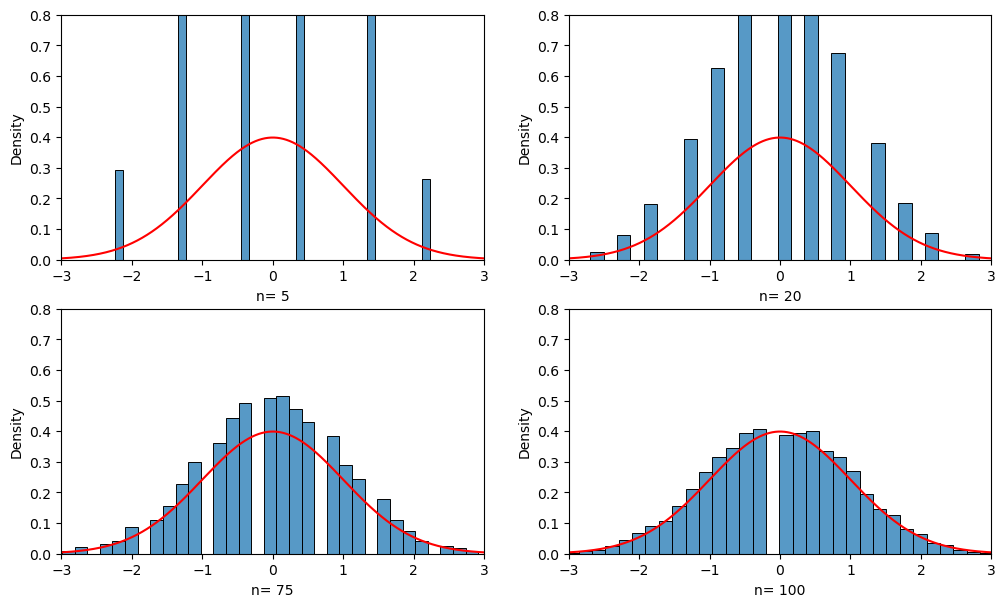

In [174]:
# subdivide the plot panel into a 2-by-2 array
fig, axes = plt.subplots(2,2, figsize=(12,7))

# set the number of repetitions and the sample sizes
reps=10000
sample_size=[5,20,75,100]

# set seed for reproducibility
np.random.seed(1)

#Dictionary to store the results
results={} 

# outer loop (loop over the sample sizes)
for n in sample_size:
    std_sample=np.zeros(reps)  #initialize the vector of standardized sample means
    
# inner loop (loop over repetitions)
    for i in range (reps):
        x=binom.rvs(1, 0.5, size=n)
        std_sample[i]=np.sqrt(n)*(np.mean(x)-0.5)/0.5
    results[n]=std_sample
    
# Loop to plot histogram and overlay the N(0,1) density in every iteration 
x = np.arange(-3, 3, 0.001)
for i, ax in enumerate(axes.flat):
    sns.histplot(ax=ax,data=results[sample_size[i]], bins=40, stat='density')
    ax.set(ylabel="Density", xlabel="n= %d" %sample_size[i])
    ax.set_xlim(-3,3)
    ax.set_ylim(0,0.8)
    ax.plot(x, norm.pdf(x), color='red')
  